<a href="https://colab.research.google.com/github/RaghadAlnouri/Raghad/blob/master/R_Alnouri_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework
Write the code outright - **Do not copy/paste from the example**
#### Instructions
1. Load the Fashion MNIST Dataset from the [keras documentation](https://keras.io/datasets/). **Use the Tensorflow version of Keras rather than the standalone Keras**
2. Visualize the data
3. Prepare the data - split, normalize and reshape
4. Train a model using using keras' functional API
5. Display the model training history in ```matplotlib```

In [0]:
import tensorflow as tf
tf.__version__


'1.15.0'

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # 60,000  of 28x28 grayscale images of 10 fashion categories
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

<function matplotlib.pyplot.show>

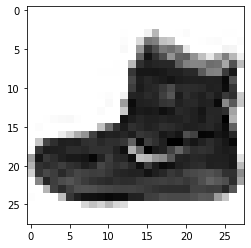

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

In [0]:
x_train = x_train / 255
x_test = x_test / 255


<function matplotlib.pyplot.show>

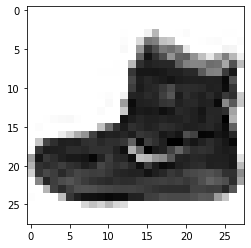

In [0]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

In [0]:
import numpy as np
idx = np.arange(len(x_train))
np.random.seed(1)
np.random.shuffle(idx)
x_train = x_train[idx]
y_train = y_train[idx]

x_train, y_train, x_valid, y_valid = x_train[:-10000], y_train[:-10000], x_train[-10000:], y_train[-10000:]


In [0]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_valid_cat = to_categorical(y_valid)
y_test_cat = to_categorical(y_test)


In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Softmax


inputs = keras.Input(shape=(28,28,))
x = Flatten()(inputs)
y = Dense(100, activation='relu')(x)
y = Dense(100, activation='relu')(y)

outputs = Dense(10, activation='softmax')(y)

func_model = keras.Model(inputs, outputs)

func_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(1e-3), metrics=[keras.metrics.categorical_accuracy, keras.metrics.categorical_accuracy])

func_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
g = func_model.fit(x_train, y_train_cat, batch_size=100, epochs=10, validation_data=(x_valid, y_valid_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 45us/sample - loss: 0.5511 - categorical_accuracy: 0.8082 - val_loss: 0.4500 - val_categorical_accuracy: 0.8385
Epoch 2/10
50000/50000 [==============================] - 2s 40us/sample - loss: 0.4002 - categorical_accuracy: 0.8556 - val_loss: 0.3699 - val_categorical_accuracy: 0.8704
Epoch 3/10
50000/50000 [==============================] - 2s 42us/sample - loss: 0.3578 - categorical_accuracy: 0.8699 - val_loss: 0.3717 - val_categorical_accuracy: 0.8701
Epoch 4/10
50000/50000 [==============================] - 2s 45us/sample - loss: 0.3297 - categorical_accuracy: 0.8789 - val_loss: 0.3532 - val_categorical_accuracy: 0.8723
Epoch 5/10
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3122 - categorical_accuracy: 0.8846 - val_loss: 0.3453 - val_categorical_accuracy: 0.8783
Epoch 6/10
50000/50000 [==============================] - 2s 45us/sample - loss: 0.29

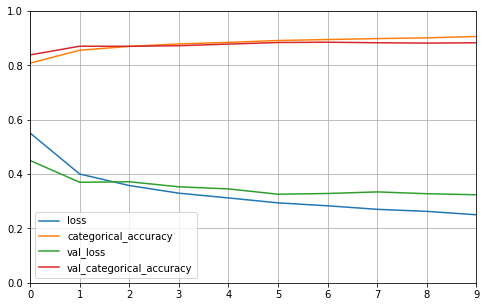

In [0]:
import pandas as pd

pd.DataFrame(g.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()  